# Crime Rate

### Basic import statement

In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import geopandas

arrest = pd.read_csv("arrests.csv")
arrest.sample(5)

,PK,CCR,AGE,GENDER,RACE,ARRESTTIME,ARRESTLOCATION,OFFENSES,INCIDENTLOCATION,INCIDENTNEIGHBORHOOD,INCIDENTZONE,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
15239,1993679,17227420,28.0,M,H,2017-11-25T02:19:00,"2600 Block Penn AV Pittsburgh, PA 15222",2701 Simple Assault. / 2718(a)(1) Strangulatio...,"2600 Block Penn AV Pittsburgh, PA 15222",Strip District,2,203.0,7.0,6.0,-79.978354,40.454893
18427,1997901,18047852,36.0,F,W,2018-03-14T15:36:00,Zone 2,903 Criminal Conspiracy. / 5902(a)(1) Prostitu...,Zone 2,NaN,2,NaN,NaN,NaN,NaN,NaN
11453,1988952,17145535,29.0,M,W,2017-08-02T19:55:00,"4200 Block Stanton AV Pittsburgh, PA 15201",3714 Careless Driving / 13(a)(31) Marijuana: P...,"5100 Block Kent WY Pittsburgh, PA 15201",Upper Lawrenceville,2,1011.0,7.0,2.0,-79.953376,40.477393
18772,1998332,18055399,55.0,F,B,2018-03-31T19:55:00,"600 Block 1st AV Pittsburgh, PA 15219",2701 Simple Assault.,"900 Block Roselle CT Pittsburgh, PA 15207",Glen Hazel,4,1504.0,5.0,3.0,-79.932584,40.406874
34895,2018951,19184151,25.0,M,B,2019-09-12T19:35:00,"200 Block E OHIO ST Pittsburgh, PA 15212",4910 Tampering with or Fabricating Physical Ev...,"200 Block E OHIO ST Pittsburgh, PA 15212",Allegheny Center,1,2204.0,NaN,NaN,0.000000,0.000000


### Counts the number of fatal/life-threatening arrests in each neighborhood
#### Not all arrests could or will result in a death so...
 I limited it to more severe offenses: Harassment, stalking, homicide, assault, misuse of firearms, reckless driving, terroristic threats, kidnapping, murder, strangulation, and missiles

In [2]:
severity = arrest['OFFENSES'].str.contains('Harassment|Stalking|Homicide|Assault|Firearms|Missiles|Reckless Driving|Terroristic Threats|Kidnapping|Murder|Strangulation', regex = True).fillna(False)
crimes = arrest[severity]
crimes.sample(5)

,PK,CCR,AGE,GENDER,RACE,ARRESTTIME,ARRESTLOCATION,OFFENSES,INCIDENTLOCATION,INCIDENTNEIGHBORHOOD,INCIDENTZONE,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
42291,2029132,19149422,31.0,M,B,2020-08-06T06:15:00,"300 Block Washington ST McKees Rocks, PA 15136",903 Criminal Conspiracy. / 2501 Criminal Homic...,"1200 Block Faulkner ST Pittsburgh, PA 15204",Sheraden,6,2022.0,2.0,5.0,-80.063662,40.454908
22860,2003514,18131745,31.0,M,B,2018-08-13T19:31:00,"Winfield ST & Winslow ST Pittsburgh, PA 15206",2706 Terroristic Threats.,"500 Block Paulson AV Pittsburgh, PA 15206",Larimer,5,1204.0,9.0,2.0,-79.912099,40.463252
35403,2019573,19194811,29.0,M,B,2019-10-06T17:41:00,"Brownsville RD & Calhoun AV Pittsburgh, PA 15210",2706 Terroristic Threats.,"1000 Block Steuben ST Pittsburgh, PA 15220",Elliott,6,2020.0,NaN,NaN,0.000000,0.000000
9572,1986644,17106973,64.0,M,B,2017-06-10T21:09:00,"N Highland AV & Penn AV Pittsburgh, PA 15206",2701 Simple Assault. / 2718(a)(1) Strangulatio...,"N Highland AV & Penn AV Pittsburgh, PA 15206",East Liberty,5,1115.0,9.0,2.0,-79.924818,40.461414
39801,2025341,20044250,24.0,M,B,2020-03-03T21:51:00,"S 27th ST & Jane ST Pittsburgh, PA 15203","6105(a)(1) Persons not to possess, use, manufa...","S 27th ST & Jane ST Pittsburgh, PA 15203",South Side Flats,3,1609.0,3.0,3.0,-79.967894,40.425388


This restriction takes the original arrest dataframe and reduces it by **33,512** datapoints.

### Graphs data

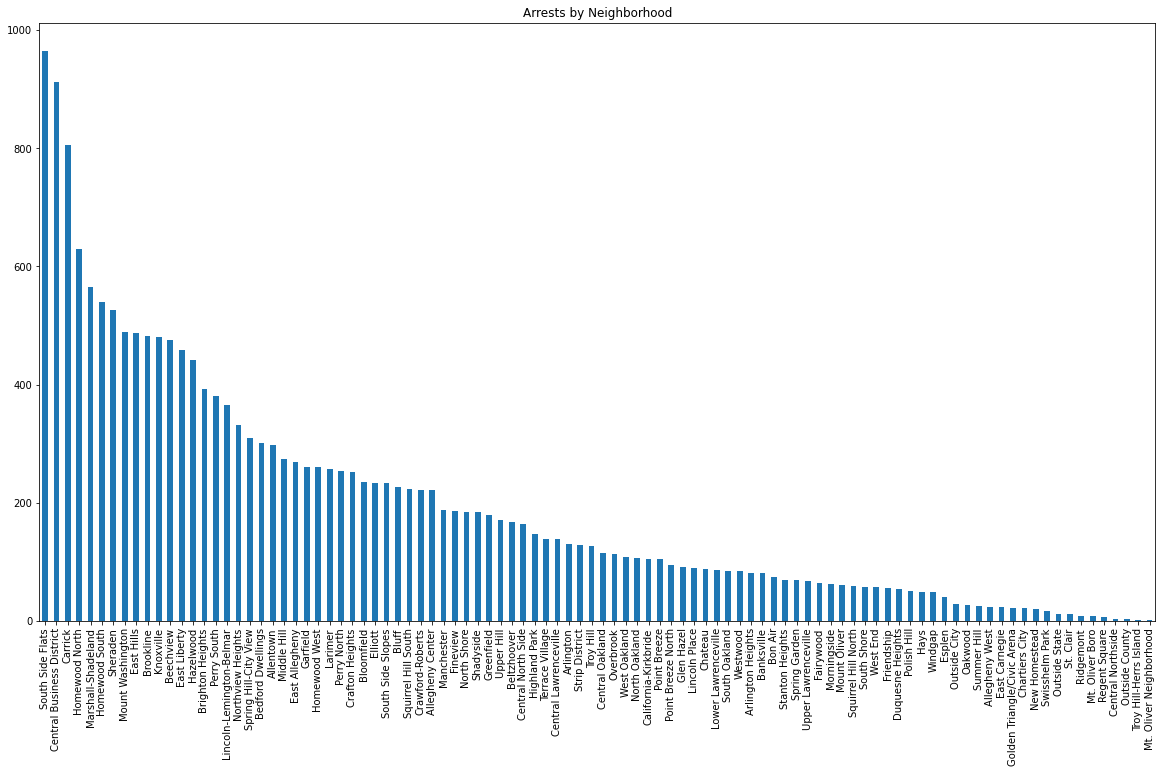

In [15]:
arrestNeighborhood=crimes["INCIDENTNEIGHBORHOOD"]
arrestNeighborhood.value_counts().sort_values(ascending = False).plot.bar(figsize=(20,11), title = "Arrests by Neighborhood")

The highest **overall** arrest data was in the Central Business District but when restricted to the more severe offenses, South Side Flats surpassed Central Business District by 52 arrests.

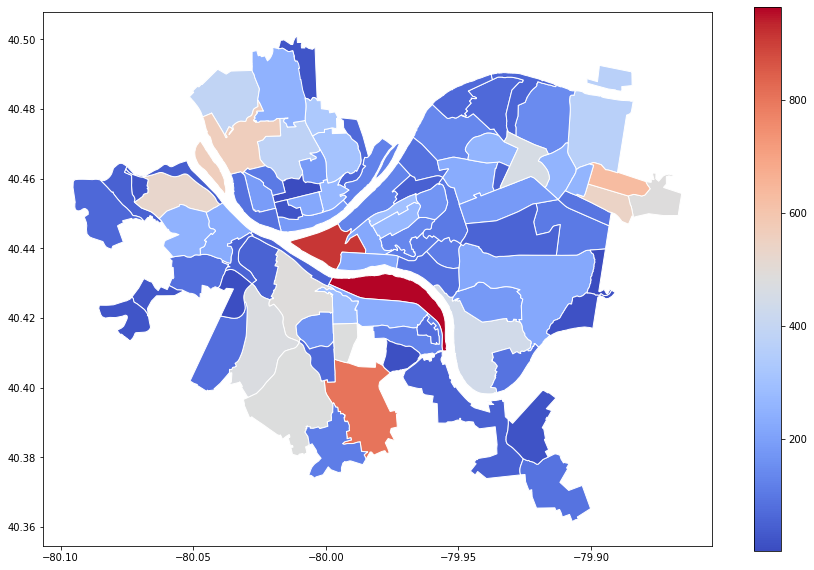

In [60]:
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp")
num_arrest = arrestNeighborhood.value_counts()
crimeMap = neighborhoods.merge(num_arrest, how='left', left_on='hood', right_index = True)
# look at the head to confirm it merged correctly
crimeMap[['hood','INCIDENTNEIGHBORHOOD','geometry']].head()
crimeMap.plot(column='INCIDENTNEIGHBORHOOD', cmap='coolwarm', edgecolor="white", legend=True, figsize=(15, 10))